In [9]:
import numpy as np
import matplotlib.pyplot as plt
import skimage
import skimage.io
import skimage.morphology

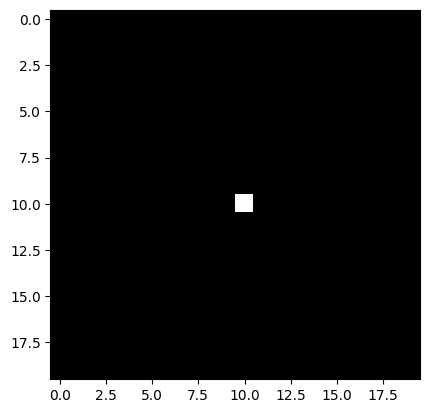

In [10]:
single_dot = np.zeros((20, 20))
single_dot[10, 10] = 1
plt.imshow(single_dot, cmap = 'gray');

In [11]:
filtered = skimage.filters.gaussian(single_dot)

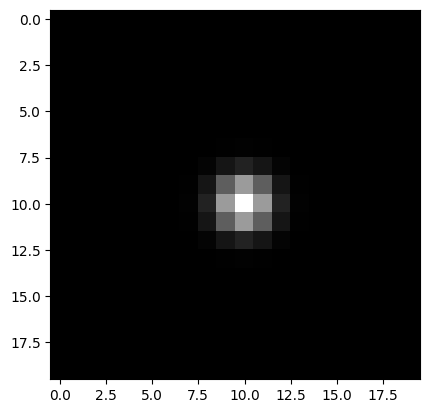

In [12]:
plt.imshow(filtered, cmap = 'gray');

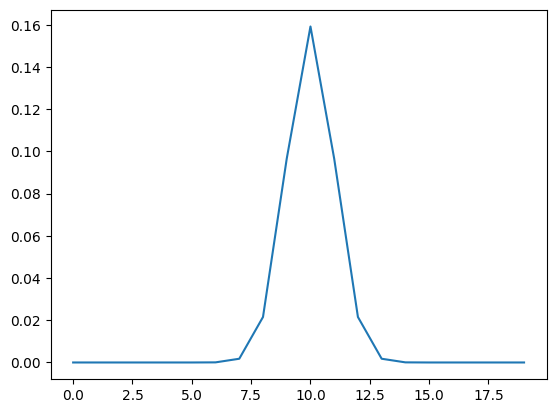

In [13]:
plt.plot(filtered[10, :]);

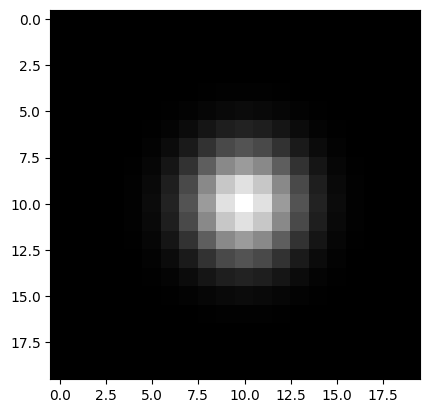

In [14]:
filtered = skimage.filters.gaussian(single_dot, sigma=2)
plt.imshow(filtered, cmap = 'gray');

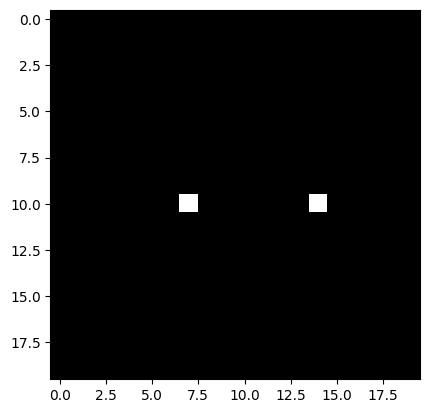

In [15]:
double_dot = np.zeros((20, 20))
double_dot[10, 7] = 1
double_dot[10, 14] = 1
plt.imshow(double_dot, cmap = 'gray');

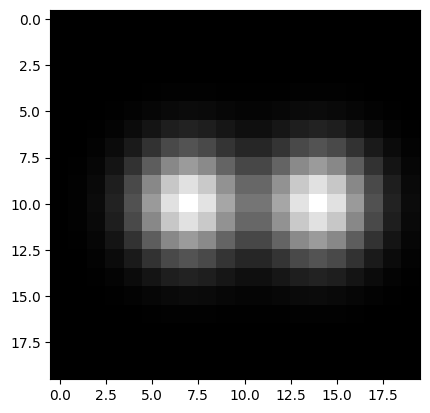

In [17]:
filtered = skimage.filters.gaussian(double_dot, sigma=2)
plt.imshow(filtered, cmap = 'gray');

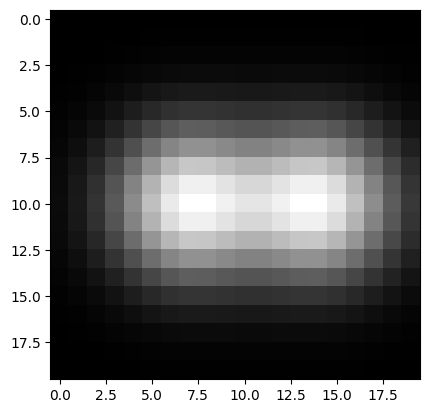

In [18]:
filtered2 = skimage.filters.gaussian(filtered, sigma=2)
plt.imshow(filtered2, cmap = 'gray');

In [20]:
noisy = filtered + 0.02 * np.random.rand(20, 20)

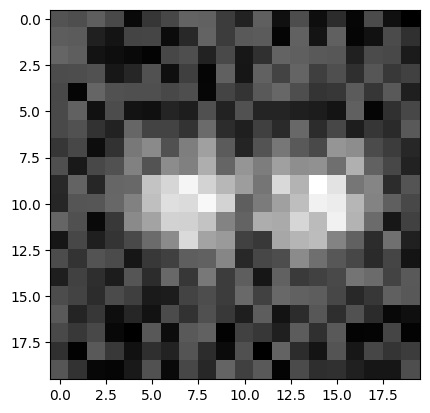

In [21]:
plt.imshow(noisy, cmap = 'gray');

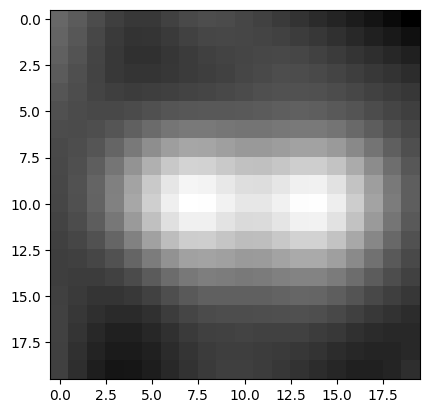

In [22]:
noise_filtered = skimage.filters.gaussian(noisy, sigma=2)
plt.imshow(noise_filtered, cmap = 'gray');

In [23]:
#image_stack = skimage.io.imread('images/46658_784_B12_1.tif')
image_stack = skimage.io.imread('https://github.com/guiwitz/PyImageCourse_beginner/raw/master/images/46658_784_B12_1.tif')
image_nuclei = image_stack[1250:1750,300:800,2]

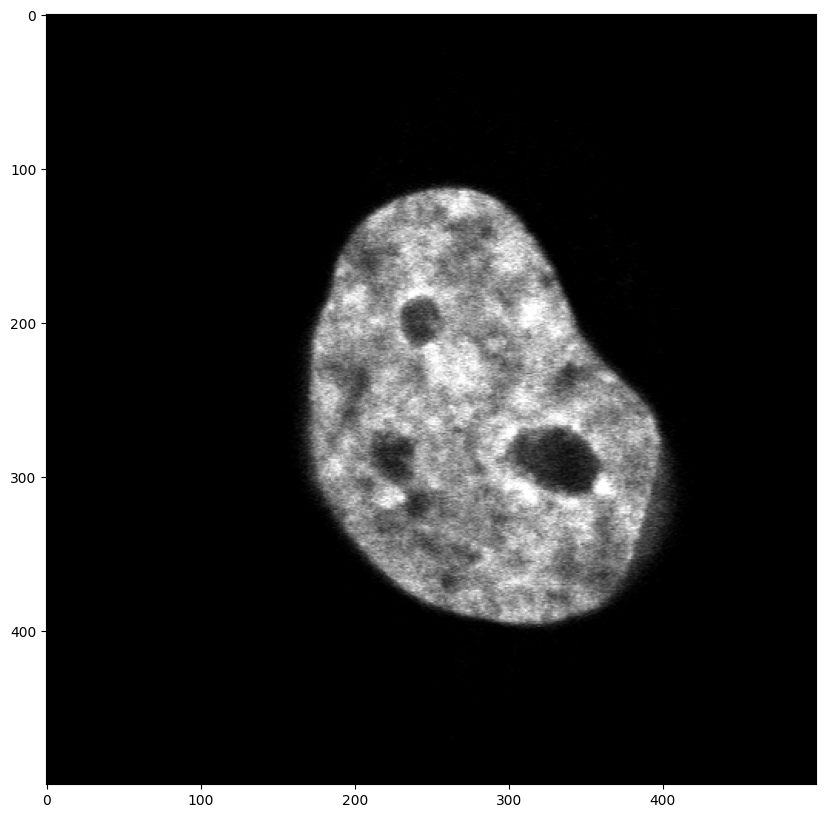

In [24]:
plt.subplots(figsize=(10, 10))
plt.imshow(image_nuclei, cmap = 'gray');

In [25]:
filtered_image = skimage.filters.gaussian(image_nuclei)

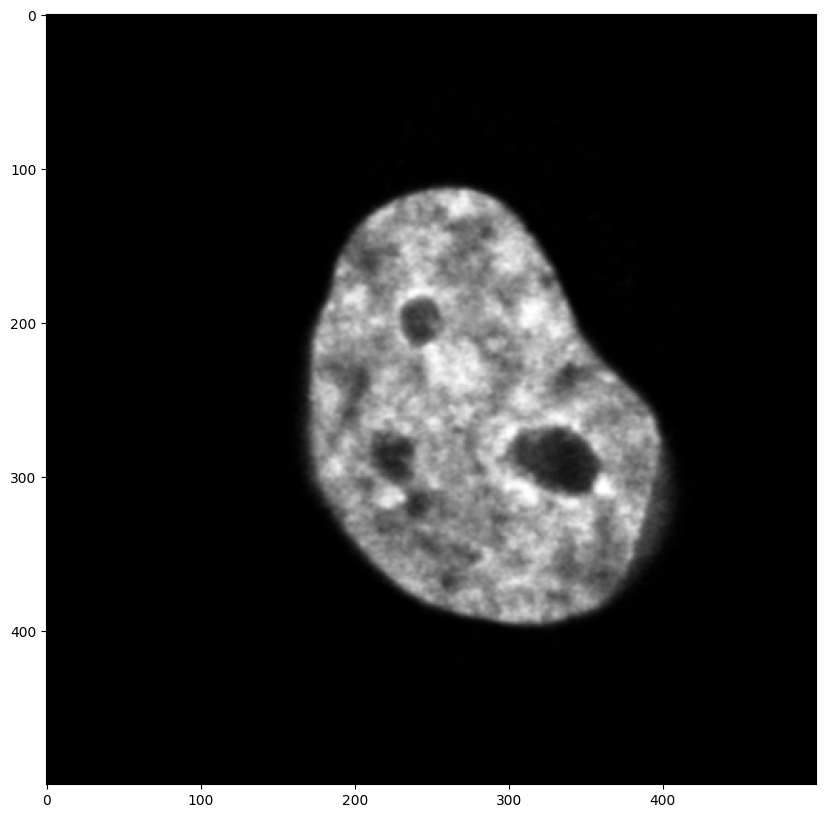

In [27]:
plt.subplots(figsize=(10, 10))
plt.imshow(filtered_image, cmap = 'gray');

In [28]:
filtered_image = skimage.filters.gaussian(image_nuclei, sigma = 5)

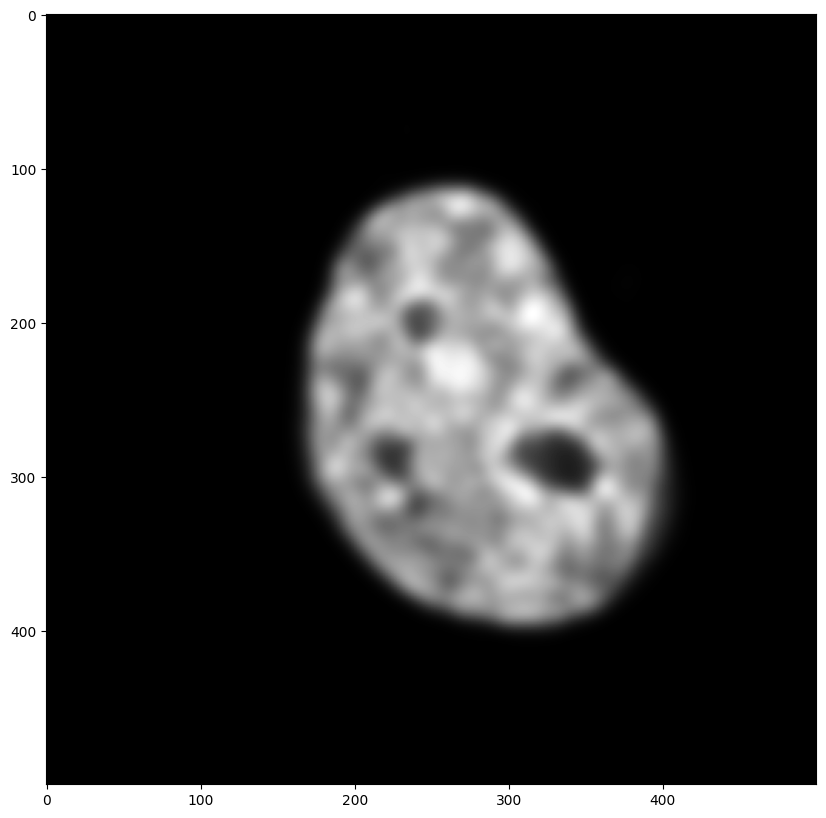

In [29]:
plt.subplots(figsize=(10, 10))
plt.imshow(filtered_image, cmap = 'gray');

In [30]:
image_noisy = skimage.util.random_noise(image_nuclei, mode='s&p')

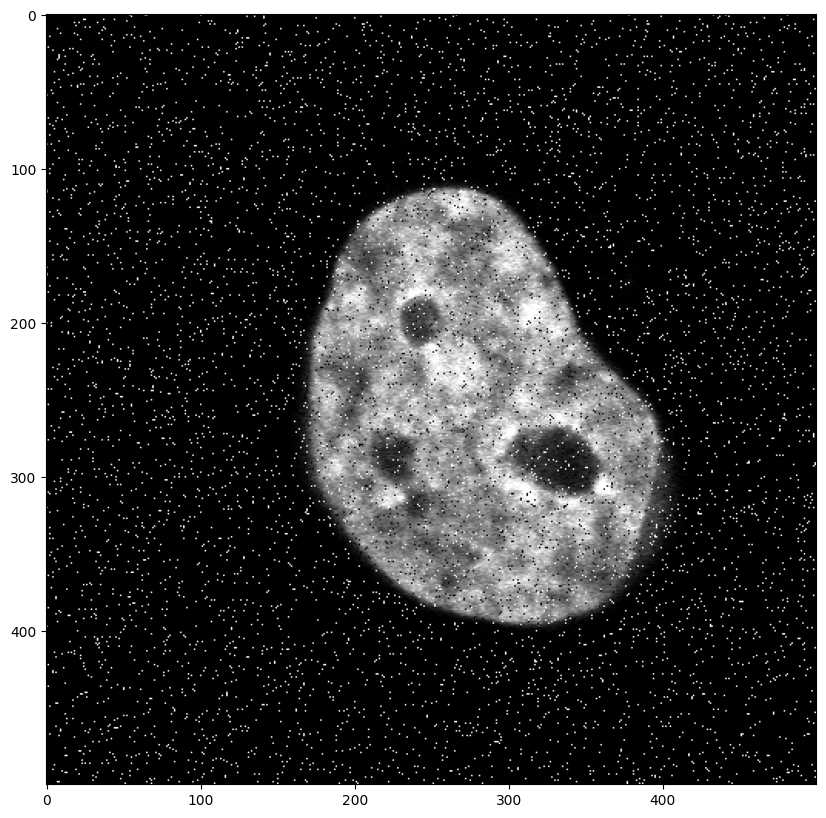

In [31]:
plt.subplots(figsize=(10, 10))
plt.imshow(image_noisy, cmap = 'gray');

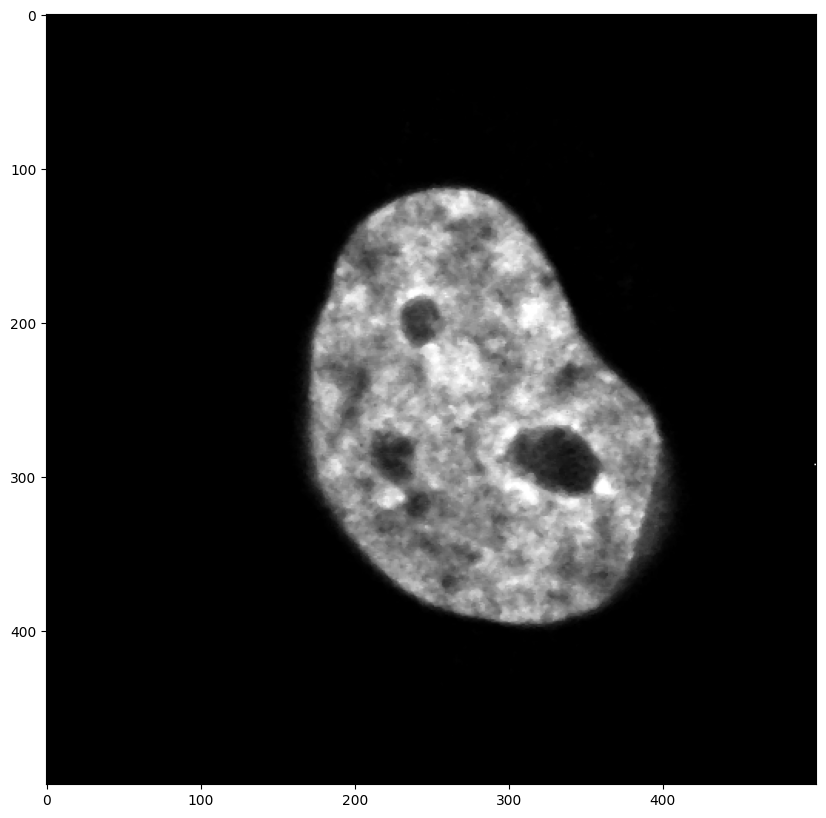

In [32]:
filtered_median = skimage.filters.median(image_noisy)

plt.subplots(figsize=(10, 10))
plt.imshow(filtered_median, cmap = 'gray');

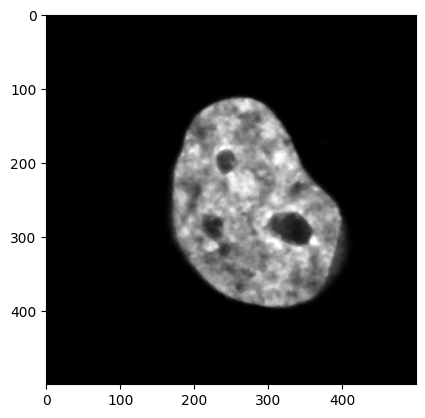

In [33]:
footprint = np.ones((5, 5))
filtered_median = skimage.filters.median(image_noisy, footprint=footprint)
plt.imshow(filtered_median, cmap = 'gray');

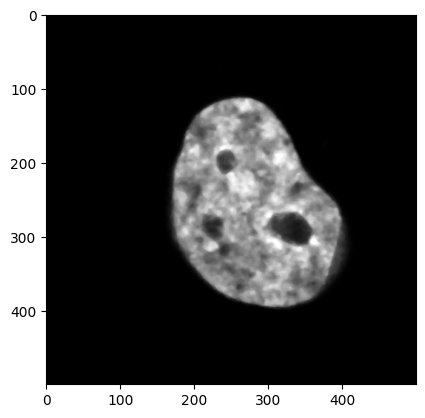

In [34]:
footprint = skimage.morphology.disk(3)
filtered_median = skimage.filters.median(image_noisy, footprint=footprint)
plt.imshow(filtered_median, cmap = 'gray');

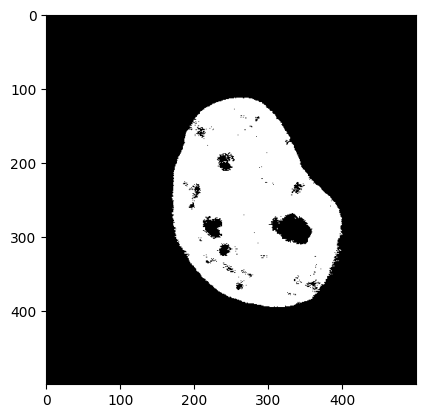

In [35]:
mask = image_nuclei > skimage.filters.threshold_otsu(image_nuclei)

plt.imshow(mask, cmap = 'gray');

In [36]:
influence_region = np.ones((5, 5))

In [37]:
eroded = skimage.morphology.binary_erosion(mask, footprint=influence_region)

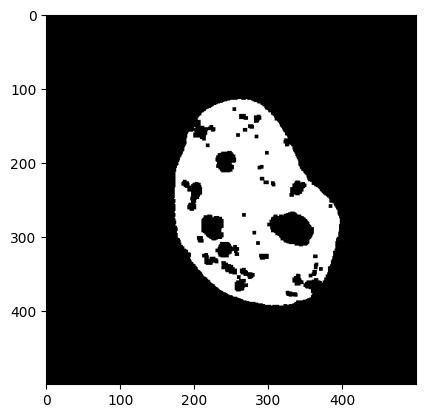

In [38]:
plt.imshow(eroded, cmap = 'gray');

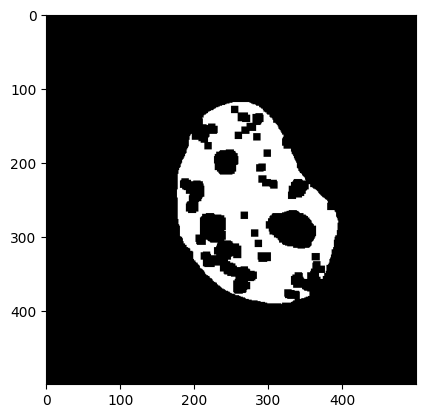

In [39]:
influence_region = np.ones((10, 10))

eroded = skimage.morphology.binary_erosion(mask, footprint=influence_region)

plt.imshow(eroded, cmap = 'gray');

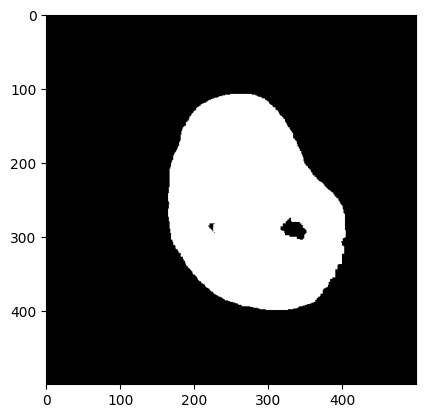

In [40]:
influence_region = np.ones((10, 10))

dilated = skimage.morphology.binary_dilation(mask, footprint=influence_region)

plt.imshow(dilated, cmap = 'gray');

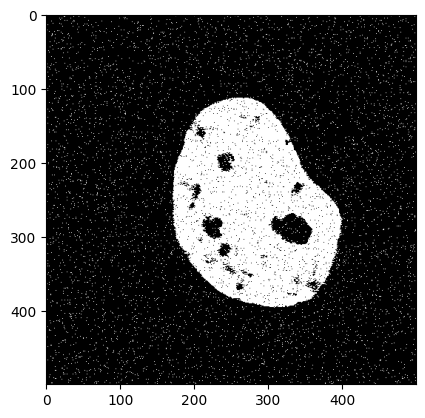

In [41]:
mask = image_noisy > skimage.filters.threshold_otsu(image_noisy)

plt.imshow(mask, cmap = 'gray');

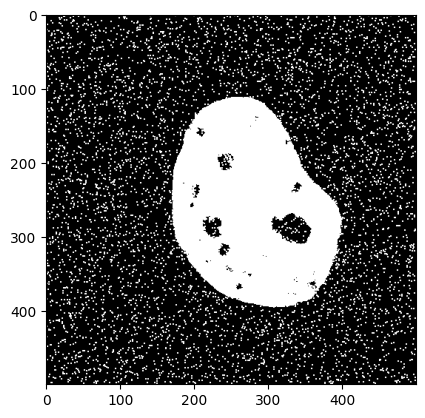

In [42]:
influence_region = np.ones((2, 2))

step1 = skimage.morphology.binary_dilation(mask, footprint=influence_region)

plt.imshow(step1, cmap = 'gray');

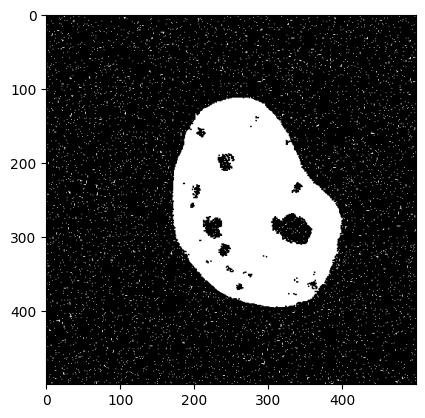

In [43]:
influence_region = np.ones((2, 2))

step2 = skimage.morphology.binary_erosion(step1, footprint=influence_region)

plt.imshow(step2, cmap = 'gray');

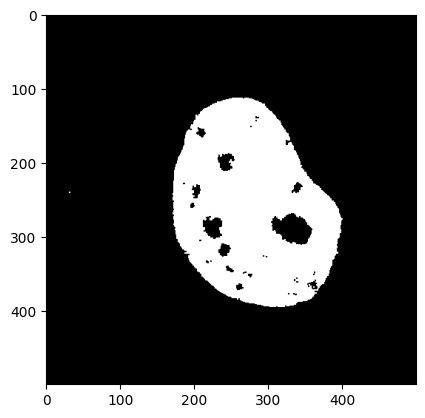

In [44]:
influence_region = np.ones((2, 2))

step3 = skimage.morphology.binary_erosion(step2, footprint=influence_region)
step4 = skimage.morphology.binary_dilation(step3, footprint=influence_region)

plt.imshow(step4, cmap = 'gray');

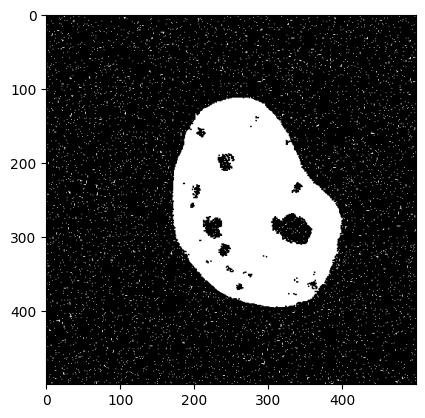

In [45]:
plt.imshow(skimage.morphology.binary_closing(mask, footprint=influence_region), cmap='gray');

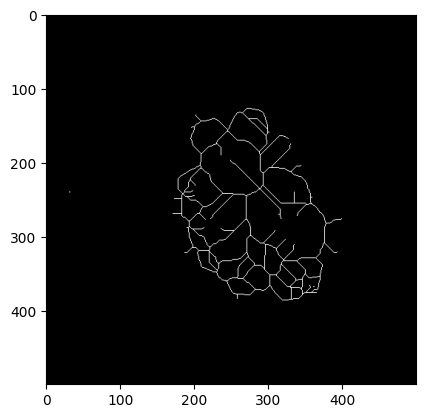

In [46]:
skeleton = skimage.morphology.skeletonize(step4)

plt.imshow(skeleton, cmap = 'gray');

In [47]:
import scipy.ndimage as ndi

In [48]:
image_closed = skimage.morphology.binary_closing(mask, footprint=influence_region)

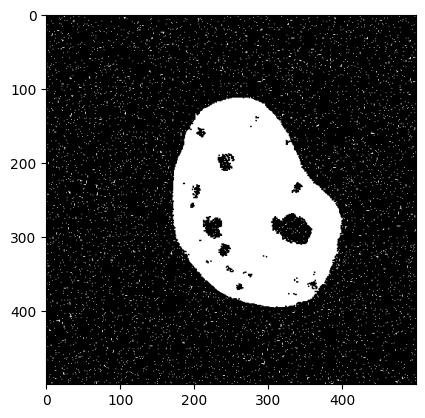

In [49]:
plt.imshow(image_closed, cmap='gray');

In [50]:
image_fill = ndi.binary_fill_holes(image_closed, skimage.morphology.disk(5))

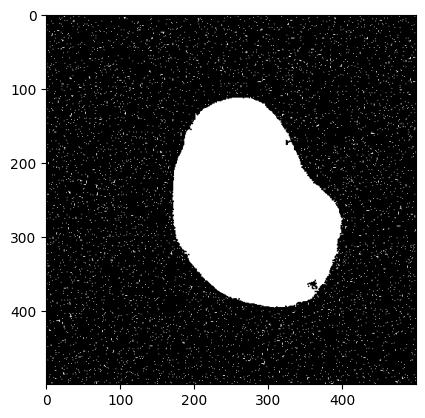

In [51]:
plt.imshow(image_fill, cmap='gray');